Ovo je primjer neuronske mreže koja ima samo jedan neuron, jednu aktivacijsku funkciju, i jednu loss/cost  funkciju. Neuronska mreža je
napravljena isključivo uz pomoć kombinacije pythona i numpya. 


Input, target, weight, bias se određuju random. 
Brojevi prolaze kroz taj neuron, zatim njegov output ide dalje u aktivacijsku funkciju te se računa početno prvo odstupanje od target vrijednosti.
Onda uz backpropagation, radimo parcijalne derivacije u nazad, dok ne dobijemo gradiente koji nas usmjeravanju prema manjoj grešci. 
Ti gradienti  uz pomoć stope učenja update-aju naše parametre weight i bias, koji onda u idućoj iteraciji daju još manju grešku.
Kroz određen broj epoha, parametri se update-aju toliko efikasno, da greška dođe do nule, a predviđena vrijednost se izjednači sa ciljanom.

Naravno program se može više puta pokrenuti, svaki put će biti novi random parametri i svaki put bi trebalo raditi. 

In [1]:
#Importanje nužnih alata za programiranje neuronske mreže sa jednim skrivenim neuronom 

import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:





# w=weight i b=bias,X=input su nasumično određeni parametri u gausovoj distribuciji gdje je sredina 0 
#dakle velika većina brojeva će biti neki float izmeđut(-2,2)
X =round(np.random.randn(),2)
w =np.random.randn()
b =np.random.randn()

#y je ciljana vrijednost, u mom slučaju između 3,10, dakle cilj mreže jest da "matematički nauči" kako podesiti parametre
#w i b u konačnici daju funkciju koja će biti što bliža ili jednaka nekoj target vrijednosti Y
y= np.random.randint(3,10)


In [3]:
#ovo je taj "skriveni sloj" koji ima jedan neuron. taj jedan neuron ima već određene radnom parametre

class Layer:
    def __init__(self):
        self.weight  =w
    
        self.bias  =b 
        #self.weight =np.random.randn()
        #self.bias = np.random.randn()

        
#forward metoda, prima Input -(random X u rasponu 5,25) i onda ga množi sa random weight, i dodaje random bias
# na kraju dobijemo output koji naravno ide u aktivacijsku funkciju Leaky Relu

    def forward(self, Input):
        self.input =Input
        self.output =Input*self.weight +self.bias
        
#backpropagation metoda, koja prima derivaciju iz prethodne funkcije koju množi sa derivacijom po b i w  layer funkcije (z=w*b+b)
#pravilo deriviranja po težinama je sljedeće   derivirano z prema w= x , derivirano z prema bias =1
#i onda upotrebimo chain rule, gdje množimo tu derivaciju sa derivacijom koja dolazi iz prethodnih funkcija
#za detalje googlati pravila deriviranja, chain_rule, te backpropagation neuronskih mreža
        
    def backward(self, dvalue):
        self.dweight = dvalue*self.input
        self.dbias = dvalue
        
        

In [4]:
#Leaky Relu klasa
#forward metoda kao input prima output od hidden layera  - z=w*x+b. u ovom slučaju input je z
#ako je Z veći od 0, onda  Leaky Relu(z) =z, ako je z manji 0, onda je Leaky Relu(z)=0.01*z dakle neka negativna vrijednost
#se množi sa 0.01 i to je onda aktivacija Leaky Relu. 

#backward metoda za računanje derivacije Leaky_Relu je jednostavna
#ako je pozitiva vrijednost prethodne funkcije Z, onda je derivacija 1, ako je negativna onda je umnožak 0.01
#naravno derivacija funkcije se množi sa prethodnom derivacijom (u našem slučaju iz MSQE klase) i onda se nova vrijednost
#prosljeđuje dalje

class L_Relu:
    def forward(self, inputs):
        self.inputs = inputs
        if inputs >0:
            self.output = inputs
        else:
            self.output =inputs *0.01
        
    def backward(self, dvalues):
        self.dvalue = dvalues *(1 if self.inputs >0  else 0.01)

In [5]:
#optimizer je clasa koja radi "update" parametara neuronske mreže , traži parametre (uz pomoć learning rate, ili stope učenja) 
#zatim metoda update_params, kao input prima objekt od klase neuronske mreže, i onda ona "update-a" weightove i biase
class Optimizer:
    def __init__(self, learning_rate=0.05):
        self.learning_rate =learning_rate
        
    def update_params(self, layer):
        layer.weight -= self.learning_rate * layer.dweight
        layer.bias  -= self.learning_rate * layer.dbias

In [6]:
#srednje kvadratno ostupanje je jedna od tehnika koja mjeri odstupanje naše predviđene vrijednosti(y_pred) sa ciljanom vrijednosti
#ciljana vrijednost je određena u početku - y  - ovdje y_true
#forward metoda kao input prima,  ouput od naše aktivacijske funkcije Leaky Relu
#backward metoda ovdje počinje računati derivaciju. ta derivacija ide dalje i množi se uz pomoć chain rule-a sa drugim derivacijama
class MSQE:
    def forward(self, y_pred, y_true):
        self.loss =(y_true-y_pred)**2
        
    def backward(self,y_pred, y_true):
        self.dvalue =-2*(y_true-y_pred)

In [7]:
#stvaramo objekt skrivenog sloja(sa jednim neuronom)
l1 = Layer()

In [8]:
#stvaramo objekt aktivacijske funkcije temeljen na klasi L_Relu
lrelu =L_Relu()

In [9]:
#stvaramo objekt koji će nam mjeriti loss/grešku 
loss =MSQE()

In [10]:
#objekt koji će update
optimizer =Optimizer()

In [11]:
#epohe, i losses , će nam služiti za jednostavnu vizualizaciju
epohe =int()
losses =[]

#naša funkcija, gdje postavimo broj epoha.

for epoch in range(150):
    l1.forward(X)
    lrelu.forward(l1.output)
    loss.forward(lrelu.output, y)
    loss.backward(lrelu.output, y)
    lrelu.backward(loss.dvalue)
    l1.backward(lrelu.dvalue)
    optimizer.update_params(l1)
    epohe +=1
    losses.append(loss.loss)
    if epoch %1==0:
        
        print(f"X je {X}, weight {round(l1.weight,2)}, bias {round(l1.bias,2)} rezultat {round(l1.output,2)},target {y}, loss MSQE {round(loss.loss,2)}")

X je 0.71, weight 0.9, bias 1.21 rezultat 0.59,target 9, loss MSQE 70.73
X je 0.71, weight 1.41, bias 1.93 rezultat 1.86,target 9, loss MSQE 51.05
X je 0.71, weight 1.84, bias 2.54 rezultat 2.93,target 9, loss MSQE 36.85
X je 0.71, weight 2.21, bias 3.05 rezultat 3.84,target 9, loss MSQE 26.6
X je 0.71, weight 2.52, bias 3.49 rezultat 4.62,target 9, loss MSQE 19.2
X je 0.71, weight 2.78, bias 3.86 rezultat 5.28,target 9, loss MSQE 13.86
X je 0.71, weight 3.01, bias 4.18 rezultat 5.84,target 9, loss MSQE 10.0
X je 0.71, weight 3.2, bias 4.45 rezultat 6.31,target 9, loss MSQE 7.22
X je 0.71, weight 3.36, bias 4.67 rezultat 6.72,target 9, loss MSQE 5.21
X je 0.71, weight 3.5, bias 4.87 rezultat 7.06,target 9, loss MSQE 3.76
X je 0.71, weight 3.62, bias 5.03 rezultat 7.35,target 9, loss MSQE 2.71
X je 0.71, weight 3.71, bias 5.17 rezultat 7.6,target 9, loss MSQE 1.96
X je 0.71, weight 3.8, bias 5.29 rezultat 7.81,target 9, loss MSQE 1.41
X je 0.71, weight 3.87, bias 5.39 rezultat 7.99,targ

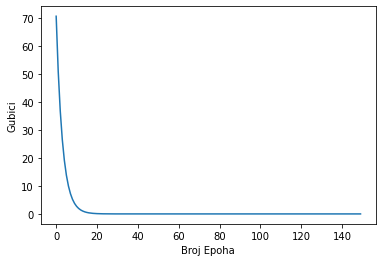

In [12]:
#Graički prikaz
plt.plot(range(epohe), losses)
plt.ylabel('Gubici')
plt.xlabel('Broj Epoha')
plt.show()